In [41]:

#####building sperical mesh tomographic model for the specfem2d 
import numpy as np
import matplotlib.pyplot as plt

maxx=45*111*1000
minx=0
maxz=0
minz=-1000*1000
nx = 800 # Number of sampling points in x direction
nz = 200  # Number of sampling points in z direction
x = np.linspace(minx,maxx,nx)
z = np.linspace(minz,maxz,nz)
spacing_x = (maxx-minx)/(nx-1)
spacing_z = (maxz-minz)/(nz-1)
print ("space x space z", spacing_x,spacing_z)

space x space z 6251.564455569462 5025.125628140703


In [42]:
def flat2sperical(vf,zf,rp):
#function [vs,zs]=mkflat2sfer(vf,zf,rp);
#mkflat2sfer.........flattening earth transform: flat to spherical earth
#
#call: [vs,zs]=mksfer2flat(vf,zf,rp);
#
#%               vf: velocities in flat Planet at depths given in zf
#%               zf: depths below surface in flat planet, at which velocites
#%                   are given
#%               rp: planetary Radius
#%
#%               zf and rp have to be in the same units.
#%               vf and zf may be matrices of arbitrary size.
#%
#% result: vs: equivalent velocity in spherical Planet
#%         zs: equivalent depths in spherical Planet
#%
#%         vs and zs will be in the same units as vf and zf are.
#%         Depth inf will be transformed into the center of the Planet.
#%
#% wave traveltimes through the spherical model will be equal to the traveltimes
#% in the flat model.
#% References: Mueller, G (1991), Inversionstheorie, Univ. Frankfurt
#%
#% Martin Knapmeyer, 18.04.2002, 10.02.2004


#%%% transformation of depths into distance from center
    r=np.exp(-zf/rp); #%r=rp*exp(-zf/rp);


#%%% transformation of velocity
    vs=r*vf; #%vs=r.*vf/rp;

#%%% transformation of radii into depths beneath surface
    zs=rp*(1-r);# %zs=rp-r;
    return vs,zs

#%%% that's all, folks.
 
def mksfer2flat(vs,zs,rp):
#function [vf,zf]=mksfer2flat(vs,zs,rp);
# mksfer2flat.........flattening earth transform: spherical to flat earth
#%
#% call: [vf,zf]=mksfer2flat(vs,zs,rp);
#%
#%               vs: velocities in spherical Planet at depths given in zs
#%               zs: depths below surface in spherical planet, at which velocites
#%                   are given
#%               rp: planetary Radius
#%
#%               zs and rp have to be in the same units.
#%               vs and zs may be matrices of arbitrary size.
#%
#% result: vf: equivalent velocity in flattened Planet
#%         zf: equivalent depths in flattened Planet
#%
#%         vf and zf will be in the same units as vs and zs are.
#%         The center of the planet will be transformed to depth inf.
#%
#% wave traveltimes through the flattened model will be equal to the traveltimes
#% in the spherical model.
#% References: Mueller, G (1991), Inversionstheorie, Univ. Frankfurt
#%
#% Martin Knapmeyer, 18.04.2002, 10.11.2003, 10.02.2004

#%%% transform spherical depth into Radius
    r=rp-zs; 

#%%% find zero elements of r = these cannot be mapped using the log
#    %%% r=0 will be mapped to zf=inf explicitly.
    #indies=np.where(r==0);
    #print indies
    #r[indies]=-1; #% r=-1 is physically impossible and produces no warning

#%%% transformation of dephts
    zf=rp*np.log(rp/r,dtype=float);
    print(rp/r)
    zf=np.abs(zf);  #% repairs the r=-1 substitution from above
    zf=np.real(zf);# % even flat depths are real numbers. MK10112003

#%%% transformation of velocities
    vf=vs/r;
    vf=vf*rp;
    vf=vf; #% repairs the r=-1 substitution from above

#%%% that's all, folks. 

    return vf,zf




In [43]:
model=np.loadtxt('Wasjamodel.md')
model=model.swapaxes(0,1)
#####here I need to transform the velocity under sperical stats into flat depth and then interp
vp_ori,z_ori=mksfer2flat(model[1],model[0],6371)
vs_ori,z_ori=mksfer2flat(model[2],model[0],6371)
rho_ori,z_ori=mksfer2flat(model[3],model[0],6371)

vp=np.interp(-z/1000,z_ori,vp_ori)*1000
vs=np.interp(-z/1000,z_ori,vs_ori)*1000
rho=np.interp(-z/1000,z_ori,rho_ori)*1000


[  1.           1.00094266   1.00094266   1.00235997   1.00235997
   1.00552399   1.00552399   1.00791014   1.00791014   1.00950721
   1.01919693   1.02658717   1.03408538   1.03408538   1.04254623
   1.05114668   1.0598902    1.06878041   1.06878041   1.07782101
   1.08701587   1.09636896   1.1058844    1.11556645   1.11556645
   1.12541954   1.13544823   1.14555426   1.1558418    1.16631579
   1.17698134   1.18784376   1.19890854   1.2101814    1.22166826
   1.23337528   1.24530884   1.25747557   1.2698824    1.28253649
   1.2954453    1.30861662   1.32205852   1.33577943   1.34978814
   1.36409378   1.37870591   1.39363447   1.40888987   1.42448295
   1.44042505   1.45672802   1.47340426   1.49046672   1.50792899
   1.52580529   1.54411052   1.5628603    1.58207102   1.6017599
   1.62194501   1.64264535   1.66388091   1.68567271   1.7080429
   1.73101481   1.75461305   1.75461305   1.77894804   1.80396243
   1.82969558   1.82969558   1.85653049   1.88416427   1.91263311
   1.9419754

/home/yjgao/anaconda3/envs/lasif/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in true_divide
/home/yjgao/anaconda3/envs/lasif/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/home/yjgao/anaconda3/envs/lasif/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


(0.0, 1000.0)

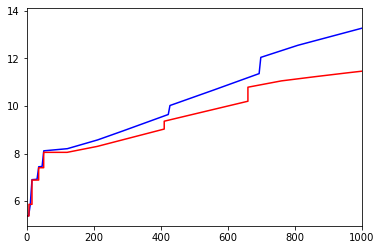

In [44]:
plt.plot(-z/1000,vp/1000,'b')
plt.plot(model[0],model[1],'r')
plt.xlim(0,1000)




In [45]:
fo = open("profile_syn.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location
xl=(6.5+10)*111*1000
xr=(8+10)*111*1000
zu=-220*1000
zb=-360*1000



for iz in np.arange(nz):
    for ix in np.arange(nx):
        #!!WARNING!! if you want 2D variations you have to add a dependence of vp on x (vp[ix,iz]).
        if x[ix]>xl and x[ix]<xr and z[iz]<zu and  z[iz] > zb:
            print( x[ix],z[iz])
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n"
        else:
            #print x[ix],z[iz]
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
        fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



Name of the file:  profile_syn.xyz
1831708.3854818523 -356783.91959799
1837959.9499374218 -356783.91959799
1844211.514392991 -356783.91959799
1850463.0788485606 -356783.91959799
1856714.64330413 -356783.91959799
1862966.2077596996 -356783.91959799
1869217.772215269 -356783.91959799
1875469.3366708385 -356783.91959799
1881720.901126408 -356783.91959799
1887972.4655819775 -356783.91959799
1894224.0300375468 -356783.91959799
1900475.5944931163 -356783.91959799
1906727.1589486857 -356783.91959799
1912978.7234042552 -356783.91959799
1919230.2878598247 -356783.91959799
1925481.8523153942 -356783.91959799
1931733.4167709637 -356783.91959799
1937984.9812265332 -356783.91959799
1944236.5456821027 -356783.91959799
1950488.110137672 -356783.91959799
1956739.6745932414 -356783.91959799
1962991.239048811 -356783.91959799
1969242.8035043804 -356783.91959799
1975494.36795995 -356783.91959799
1981745.9324155194 -356783.91959799
1987997.4968710889 -356783.91959799
1994249.0613266584 -356783.91959799
18

1831708.3854818523 -271356.7839195981
1837959.9499374218 -271356.7839195981
1844211.514392991 -271356.7839195981
1850463.0788485606 -271356.7839195981
1856714.64330413 -271356.7839195981
1862966.2077596996 -271356.7839195981
1869217.772215269 -271356.7839195981
1875469.3366708385 -271356.7839195981
1881720.901126408 -271356.7839195981
1887972.4655819775 -271356.7839195981
1894224.0300375468 -271356.7839195981
1900475.5944931163 -271356.7839195981
1906727.1589486857 -271356.7839195981
1912978.7234042552 -271356.7839195981
1919230.2878598247 -271356.7839195981
1925481.8523153942 -271356.7839195981
1931733.4167709637 -271356.7839195981
1937984.9812265332 -271356.7839195981
1944236.5456821027 -271356.7839195981
1950488.110137672 -271356.7839195981
1956739.6745932414 -271356.7839195981
1962991.239048811 -271356.7839195981
1969242.8035043804 -271356.7839195981
1975494.36795995 -271356.7839195981
1981745.9324155194 -271356.7839195981
1987997.4968710889 -271356.7839195981
1994249.0613266584 -2

In [46]:
fo = open("MODELS/profile_syn_numpy.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
#fo.write(line1)
#fo.write(line2)
#fo.write(line3)
#fo.write(line4)


###set the heterogeneities location
xl=(6.5+10)*111*1000
xr=(8+10)*111*1000
zu=-220*1000
zb=-360*1000



for iz in np.arange(nz):
    for ix in np.arange(nx):
        #!!WARNING!! if you want 2D variations you have to add a dependence of vp on x (vp[ix,iz]).
        if x[ix]>xl and x[ix]<xr and z[iz]<zu and  z[iz] > zb:
            print( x[ix],z[iz])
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n"
        else:
            #print x[ix],z[iz]
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
        fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



Name of the file:  MODELS/profile_syn_numpy.xyz
1831708.3854818523 -356783.91959799
1837959.9499374218 -356783.91959799
1844211.514392991 -356783.91959799
1850463.0788485606 -356783.91959799
1856714.64330413 -356783.91959799
1862966.2077596996 -356783.91959799
1869217.772215269 -356783.91959799
1875469.3366708385 -356783.91959799
1881720.901126408 -356783.91959799
1887972.4655819775 -356783.91959799
1894224.0300375468 -356783.91959799
1900475.5944931163 -356783.91959799
1906727.1589486857 -356783.91959799
1912978.7234042552 -356783.91959799
1919230.2878598247 -356783.91959799
1925481.8523153942 -356783.91959799
1931733.4167709637 -356783.91959799
1937984.9812265332 -356783.91959799
1944236.5456821027 -356783.91959799
1950488.110137672 -356783.91959799
1956739.6745932414 -356783.91959799
1962991.239048811 -356783.91959799
1969242.8035043804 -356783.91959799
1975494.36795995 -356783.91959799
1981745.9324155194 -356783.91959799
1987997.4968710889 -356783.91959799
1994249.0613266584 -35678

1831708.3854818523 -271356.7839195981
1837959.9499374218 -271356.7839195981
1844211.514392991 -271356.7839195981
1850463.0788485606 -271356.7839195981
1856714.64330413 -271356.7839195981
1862966.2077596996 -271356.7839195981
1869217.772215269 -271356.7839195981
1875469.3366708385 -271356.7839195981
1881720.901126408 -271356.7839195981
1887972.4655819775 -271356.7839195981
1894224.0300375468 -271356.7839195981
1900475.5944931163 -271356.7839195981
1906727.1589486857 -271356.7839195981
1912978.7234042552 -271356.7839195981
1919230.2878598247 -271356.7839195981
1925481.8523153942 -271356.7839195981
1931733.4167709637 -271356.7839195981
1937984.9812265332 -271356.7839195981
1944236.5456821027 -271356.7839195981
1950488.110137672 -271356.7839195981
1956739.6745932414 -271356.7839195981
1962991.239048811 -271356.7839195981
1969242.8035043804 -271356.7839195981
1975494.36795995 -271356.7839195981
1981745.9324155194 -271356.7839195981
1987997.4968710889 -271356.7839195981
1994249.0613266584 -2

In [52]:
#nx=500
#nz=200
###the center of the velocity anomaly
isx=400
isz=120
perturb=np.ones((800,200))
for i in np.arange(isx-100,isx+100):
    #print(i-isx)
    for j in np.arange(isz,nz):
        #print(100*np.sqrt(2*np.abs((i-isx)/100)-((i-isx)/100)**2))
        if j<30*np.sqrt(2*np.abs((i-isx)/30)-((i-isx)/30)**2)+isz:
              perturb[i][j]=0.95
                
#50*(-2.14)*np.sqrt(np.sqrt(2)-np.sqrt(np.abs(x_heart/50)))
for i in np.arange(isx-100,isx+100):
    #print(i-isx)
    for j in np.arange(0,isz):
        #print(np.sqrt(np.sqrt(2)-np.sqrt(np.abs(i-isx/100))))
        if j> 30*(-2.14)*(np.sqrt(np.sqrt(2)-np.sqrt(np.abs((i-isx)/30))))+isz:
              perturb[i][j]=0.95


/home/yjgao/anaconda3/envs/lasif/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/home/yjgao/anaconda3/envs/lasif/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


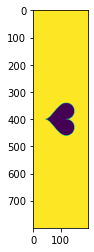

In [53]:
import matplotlib.pyplot as plt
plt.imshow(perturb)

In [54]:
# Open a file in write mode
fo = open("MODELS/profile_obs.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location
xl=(5.5+10)*111*1000
xr=(9+10)*111*1000
zu=-200*1000
zb=-380*1000



for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb[ix][iz]*vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



Name of the file:  MODELS/profile_obs.xyz


In [16]:
perturb.shape

(500, 200)

In [15]:
perturb.min()

0.95

In [55]:
fo = open("MODELS/profile_obs_numpy.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
#fo.write(line1)
#fo.write(line2)
#fo.write(line3)
#fo.write(line4)


###set the heterogeneities location
xl=(5.5+10)*111*1000
xr=(9+10)*111*1000
zu=-200*1000
zb=-380*1000



for iz in np.arange(nz):
    for ix in np.arange(nx):
        #!!WARNING!! if you want 2D variations you have to add a dependence of vp on x (vp[ix,iz]).
        if x[ix]>xl and x[ix]<xr and z[iz]<zu and  z[iz] > zb:
            print( x[ix],z[iz])
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(1.08*vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n"
        else:
            #print x[ix],z[iz]
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
        fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



Name of the file:  MODELS/profile_obs_numpy.xyz
